# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [52]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import regex


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [53]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [54]:
# Your code here:

fifa.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,94.0,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,80.0,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,86.0,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,76.0,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,43.0,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [91]:
# Your code here:

def cleaning_value(x):
    if x.startswith("€"):
        x=x[1:]
    if x.endswith("M"):
        x=x[:-1]
    if x.endswith("K"):
        x=float(x[:-1])/1000
    return float(x)

fifa["ValueNumeric"]=fifa["Value"].apply(lambda x: cleaning_value(x))

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [92]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

V=fifa["ValueNumeric"]
F=fifa["Preferred Foot"]
P=fifa["Position"]

formula = 'V ~ C(F) + C(P)'
lm = ols(formula, data=fifa).fit()
sm.stats.anova_lm(lm, typ=2)



,sum_sq,df,F,PR(>F)
C(F),231.040261,1.0,7.494444,6.195081e-03
C(P),16605.324356,26.0,20.716946,1.299333e-95
Residual,551516.635896,17890.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:

The null hypothesis is that the mean is the same for all groups. With an p-value lower than 0.05 we can reject the null hypothesis, therefore, the mean is different for all groups.

Looking at the F test factor we can see that the variable "position" is more dispersed than the variable "foot" 


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [93]:
# Your code here:

V=fifa["ValueNumeric"]
N=fifa["Nationality"]


formula = 'V ~ C(N)'
lm = ols(formula, data=fifa).fit()
sm.stats.anova_lm(lm, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
C(N),162.0,32828.995997,202.648123,6.719634,5.651112e-132
Residual,17755.0,535448.410562,30.157613,NaN,NaN


What is your conclusion from this ANOVA?

The mean is not the same for all groups and its dispersed arround the mean (F value)

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [94]:
# Your code here:

fifa=fifa[fifa.isna().sum(axis=1)==0]


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [95]:
# Your code here:
Y=fifa["ValueNumeric"]
X=fifa[["Stamina","SprintSpeed"]]

X=sm.add_constant(X)

model=sm.OLS(endog=Y,exog=X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          8.04e-193
Time:                        18:54:36   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      0.000      -3.456      -2.684
Stamina         0.0604      0.003     18.349      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.380      0.000       0.019       0.033
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:
The model does not explain the variance of the data since $R² \approx 0.05$. Also, the F-statistic value shows us that the data are highly dispersed.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [96]:
# Your code here:

Y=fifa["ValueNumeric"]
X=fifa["Potential"]

X=sm.add_constant(X)

model=sm.OLS(endog=Y,exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:01:40   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.000     -36.222     -34.656
Potential      0.5312      0.006     95.172      0.000       0.520       0.542
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:
This model explains a little of the variance of the data, but data much more disperse than in last model and not all the variance can be explained with such a simple model


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

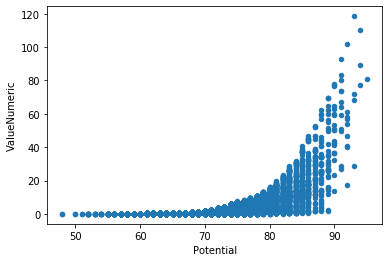

In [99]:
# Your code here:

fifa.plot.scatter(y="ValueNumeric",x="Potential")

This is not a lineal relationship. It somehow follows and exponential distribution modeled attenuated with other parameters.